<link rel="stylesheet" href="https://gist.github.com/vietjtnguyen/6643431/raw/9e88999ef07c40ee4af6be9cb3e0c9e618ba64a3/custom.css" type="text/css"/>

<style>
@import url(http://fonts.googleapis.com/css?family=Droid+Sans+Mono);

h1, h2, h3, h4, h5, h6 {
    font-family: "STIX-Bold", serif;
}
p, ol, ul {
    font-family: "STIX-Regular", serif;
    font-size: 115%;
}
ul ul, li, ul li, li li {
    font-family: "STIX-Regular", serif;
    font-size: 100%;
}
b {
    font-family: "STIX-Bold", serif;
    font-size: 115%;
}
i {
    font-family: "STIX-Italic", serif;
    font-size: 115%;
}
code, pre, div.input_prompt, div.output_area pre {
    font-family: "Droid Sans Mono", "Courier New", monospace;
}
.CodeMirror pre {
    font-family: "Droid Sans Mono", "Courier New", monospace;
}

/*
@import url(http://fonts.googleapis.com/css?family=Source+Code+Pro);
.CodeMirror pre {
    font-family: "cmu_typewriter_textregular", monospace;
    font-size: 115%;
}
*/

span.MathJax {
    font-size: 86.956521739%;
}
</style>

# Logistic Regression

## Notation

The problem structure is the classic classification problem. Our data set $\mathcal{D}$ is composed of $N$ samples. Each sample is a tuple containing a feature vector and a label. For any sample $n$ the feature vector is a $d+1$ dimensional column vector denoted by ${\bf x}_n$ with $d$ real-valued components known as features. Samples are represented in homogeneous form with the first component equal to $1$: $x_0=1$. Vectors are bold-faced. The associated label is denoted $y_n$ and can take on only two values: $1$ or $0$.

$$
\mathcal{D} = \lbrace ({\bf x}_1, y_1), ({\bf x}_2, y_2), ..., ({\bf x}_N, y_N) \rbrace \\
{\bf x}_n = \begin{bmatrix} 1 & x_1 & ... & x_d \end{bmatrix} 
$$

# Derivation

Despite the name logistic *regression* this is actually a probabilistic classification model. It is also a linear model which can be subjected to nonlinear transforms.

All linear models make use of a "signal" $s$ which is a linear combination of the input vector ${\bf x}$ components weighed by the corresponding components in a weight vector ${\bf w}$.

$$
{\bf w} = \begin{bmatrix} w_0 & w_1 & ... & w_d \end{bmatrix} \\
s = w_0 + w_1 x_1 + \;...\; + w_d x_d = \sum_{i=0}^d w_i x_i = {\bf w} \cdot {\bf x} = {\bf x} {\bf w}^T
$$

Note that the homogeneous representation (with the $1$ at the first component) allows us to include a constant offset using a more compact vector-only notation (instead of ${\bf x} {\bf w}^T+b$).

Linear regression uses the signal directly without modification:

$$
h({\bf x}) = s
$$

Logistic regression passes the signal through the logistic/sigmoid but then treats the result as a probability:

$$
h({\bf x}) = \sigma(s)
$$

The [logistic function](http://en.wikipedia.org/wiki/Logistic_function) is

$$
\sigma(s) = \frac{e^s}{1+e^s} = \frac{1}{1+e^{-s}}
$$

There are many other formulas that can achieve a soft threshold such as the hyperbolic tangent, but this function results in some nice simplification.

We say that the data is generated by a noisy target.

$$
P(y\mid{\bf x})=\begin{cases}
f({\bf x}) & \text{for }y=1 \\
1-f({\bf x}) & \text{for }y=0
\end{cases}
$$

With this noisy target we want to learn a hypothesis $h({\bf x})$ that best fits the above noisy target according to some error function.

$$
h({\bf x})=\sigma({\bf x} {\bf w}^T)\approx f({\bf x})
$$

It's important to note that the data does not tell you the probability of a label but rather what label the sample has after being generated by the target distribution.

## Error Measure

To learn a good hypothesis we want to find a hypothesis parameterization ${\bf w}$ (the weight vector) that minimizes some in-sample error measure $E_\text{in}$.

$$
{\bf w}_h = \underset{{\bf w}}{\operatorname{argmin}} \; E_\text{in}({\bf w})
$$

The error measure we will use is both plausible and nice. It is based on likelihood which is the probability of generating the data given a model.

If our hypothesis is close to our target distribution ($h\approx f$) then we expect that probability of generating the data to be high.

There is some controversy with using likelihood. We are really looking for the most probable hypothesis given the data: $\underset{h}{\operatorname{argmax}} P(h\mid{\bf x})$. The likelihood approach is looking for the hypothesis that makes the data most probable: $\underset{h}{\operatorname{argmax}} P({\bf x}\mid h)$.

To determine the likelihood we assume the data was generated with our hypothesis $h$:

$$
P(y\mid{\bf x})=\begin{cases}
h({\bf x}) & \text{for }y=1 \\
1-h({\bf x}) & \text{for }y=0
\end{cases} \\
$$

where $h({\bf x})=\sigma({\bf w}^T {\bf x})$.

$$
\text{if } y = 1 \text{ then } h({\bf x}) = \sigma({\bf x} {\bf w}^T) \\
\text{if } y = 0 \text{ then } 1 - h({\bf x}) = 1 - \sigma({\bf x} {\bf w}^T) \\
$$

Using this simplification,

$$
P(y\mid{\bf x})=h({\bf x})^y(1-h({\bf x}))^{1-y}
$$

The likelihood is defined for a data set $\mathcal{D}$ with $N$ samples given a hypothesis (denoted arbitrarily $g$ here):

$$
L(\mathcal{D} \mid h) =
\prod_{n=1}^{N} P(y_n \mid {\bf x}_n) =
\prod_{n=1}^{N} h({\bf x_n})^{y_n}(1-h({\bf x_n}))^{1-y_n} = \prod_{n=1}^{N} \sigma({\bf x_n} {\bf w}^T)^{y_n}(1 - \sigma({\bf x_n} {\bf w}^T))^{1-y_n}
$$

Now finding a good hypothesis is a matter of finding a hypothesis parameterization ${\bf w}$ that maximizes the likelihood.

$$
{\bf w} =
\underset{{\bf w}}{\operatorname{argmax}} \; L(\mathcal{D} \mid h)
$$

Maximizing the likelihood is equivalent to maximizing the log of the function since the natural logarithm is a monotonically increasing function:

$$
\underset{{\bf w}}{\operatorname{argmax}} \; \ln \left( \prod_{n=1}^{N} \sigma({\bf x_n} {\bf w}^T)^{y_n}(1 - \sigma({\bf x_n} {\bf w}^T))^{1-y_n} \right)
$$

We can maximize the above proportional to a constant as well so we'll tack on a $\frac{1}{N}$:

$$
\underset{{\bf w}}{\operatorname{argmax}} \; \frac{1}{N} \ln \left( \prod_{n=1}^{N} \sigma({\bf x_n} {\bf w}^T)^{y_n}(1 - \sigma({\bf x_n} {\bf w}^T))^{1-y_n} \right)
$$

Now maximizing that is the same as minimizing its negative:

$$
\underset{{\bf w}}{\operatorname{argmin}} \left[ -\frac{1}{N} \ln \left( \prod_{n=1}^{N} \sigma({\bf x_n} {\bf w}^T)^{y_n}(1 - \sigma({\bf x_n} {\bf w}^T))^{1-y_n} \right) \right]
$$

Using properties of logarithm

$$
\underset{{\bf w}}{\operatorname{argmin}} \left[ -\frac{1}{N} \sum_{n=1}^{N} \ln \left(\sigma({\bf x_n} {\bf w}^T)^{y_n}(1 - \sigma({\bf x_n} {\bf w}^T))^{1-y_n} \right) \right]
$$



$$
\underset{{\bf w}}{\operatorname{argmin}} \left[ -\frac{1}{N} \sum_{n=1}^{N} \left(y_n \ln \sigma({\bf x_n} {\bf w}^T)+(1-y_n) \ln (1 - \sigma({\bf x_n} {\bf w}^T)) \right) \right]
$$

Now we have a much nicer form for the error measure known as the "cross-entropy" error.

$$
E_\text{in}({\bf w}) = -\frac{1}{N} \sum_{n=1}^{N} \left(y_n \ln \sigma({\bf x_n} {\bf w}^T)+(1-y_n) \ln (1 - \sigma({\bf x_n} {\bf w}^T)) \right)
$$

Logistic regression models tend to overfit frequently, so it is always a good idea to add regularization term to increase the generalization of the model. $L2$ regularization penalizes large weights, thus a setting of the weights that matches the training data perfectly— but uses many weights with high values to do so—will be penalized more than a setting that matches the data a little less well, but does so using smaller weights.
We will refer to regularization loss as $R(\bf w)$.
$$
R({\bf w}) = \frac{\lambda}{2d} \sum_{i=1}^{d} w_i^2
$$

So our total loss function $J(\bf w)$ becomes:

$$
J({\bf w}) = E_{in}({\bf w}) + R({\bf w}) = -\frac{1}{N} \sum_{n=1}^{N} \left(y_n \ln \sigma({\bf x_n} {\bf w}^T)+(1-y_n) \ln (1 - \sigma({\bf x_n} {\bf w}^T)) \right) + \frac{\lambda}{2d} \sum_{i=1}^{d} w_i^2
$$

## Learning Algorithm

The learning algorithm is how we search the set of possible hypotheses (hypothesis space $\mathcal{H}$) for the best parameterization (in this case the weight vector ${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error measure.

There is no nice, closed-form solution like with [least-squares linear regression](http://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) so we will use [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) instead.

Luckily, our "cross-entropy" error measure is [convex](http://en.wikipedia.org/wiki/Convex_optimization) so there is only one minimum. Thus the minimum we arrive at is the global minimum.

Gradient descent is a general method and requires twice differentiability for [smoothness](http://en.wikipedia.org/wiki/Smooth_function). It updates the parameters using a first-order approximation of the error surface.

$$
{\bf w}_{i+1} = {\bf w}_i - \eta \nabla J({\bf w}_i)
$$

$$
\nabla J({\bf w})= \nabla E_{in}({\bf w}) + \nabla R(\bf w)
$$


$$
\frac{\partial R}{\partial w_i} = \frac{\lambda}{d} w_i
$$

so
$$
\nabla R({\bf w}) = \frac{\lambda}{d} {\bf w}
$$

let's denote $L_n({\bf w})$ to be the loss for a single entry $({\bf x_n}, {y_n})$, so that $E_{in}({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} L_n({\bf w}) $. SO
$$
\begin{align}
&L_n({\bf w}) = -\left(y_n \ln \sigma({\bf x_n} {\bf w}^T)+(1-y_n) \ln (1 - \sigma({\bf x_n} {\bf w}^T)) \right) \\
&\frac{\partial L_n({\bf w})}{\partial w_i} = -(y_n \frac{1}{\sigma({\bf x_n} {\bf w}^T)} \frac{\partial \sigma({\bf x_n} {\bf w}^T)}{\partial w_i} - (1-y_n) \frac{1}{1-\sigma({\bf x_n} {\bf w}^T)} \frac{\partial \sigma({\bf x_n} {\bf w}^T)}{\partial w_i}) \\
&\frac{\partial \sigma({\bf x_n} {\bf w}^T)}{\partial w_i} = x_{ni} \frac{e^{-{\bf x_n} {\bf w}^T}}{(1+e^{-{\bf x_n} {\bf w}^T})^2} = x_{ni} \sigma({\bf x_n} {\bf w}^T)(1-\sigma({\bf x_n} {\bf w}^T) \\
&\frac{\partial L_n({\bf w})}{\partial w_i} = -(y_n \frac{1}{\sigma({\bf x_n} {\bf w}^T)}x_{ni} \sigma({\bf x_n} {\bf w}^T)(1-\sigma({\bf x_n} {\bf w}^T) - (1-y_n) \frac{1}{1-\sigma({\bf x_n} {\bf w}^T)}x_{ni} \sigma({\bf x_n} {\bf w}^T)(1-\sigma({\bf x_n} {\bf w}^T)) \\
&= x_{ni} (\sigma({\bf x_n} {\bf w}^T) - y_n) \\
&\nabla L_n({\bf w}) = {\bf x_n}(\sigma({\bf x_n} {\bf w}^T) - y_n) \\
&\nabla E_{in}({\bf w}) = \frac{1}{N}\sum_{n=1}^{N} {\bf x_n}(\sigma({\bf x_n} {\bf w}^T) - y_n) \\
&\nabla J({\bf w}) = \frac{1}{N}\sum_{n=1}^{N} {\bf x_n}(\sigma({\bf x_n} {\bf w}^T) - y_n) + \frac{\lambda}{d} {\bf w} \\
\end{align}
$$

Our weight update rule per batch gradient descent becomes

$$
\begin{align}
{\bf w}_{i+1} &= {\bf w}_i - \eta \; \nabla E_\text{in}({\bf w}_i) \\
&= {\bf w}_i - \eta \left(\frac{1}{N}\sum_{n=1}^{N} {\bf x_n}(\sigma({\bf x_n} {\bf w}_i^T) - y_n) + \frac{\lambda}{d} {\bf w}_i \right)\\
\end{align}
$$

where $\eta$ is our learning rate.

### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### About dataset
We’ll use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

To download the data, we will use `!wget` to download it from IBM Object Storage.

In [1]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-07-28 20:45:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K   161KB/s    in 0.2s    

2020-07-28 20:45:42 (161 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



### Load Data From CSV File  

In [48]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...    pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...      1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...      0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...      0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...      1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...      0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

## Data pre-processing and selection

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [47]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0

In [49]:
churn_df.shape

(200, 28)

In [50]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [51]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1., 1., 0., 0., 0.])

Also, we normalize the dataset:

In [52]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset
split our dataset into train and test set:

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [56]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluation

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [58]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


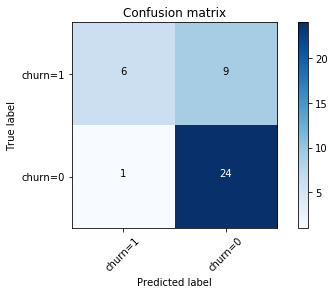

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [61]:
print (classification_report(y_test, yhat))


             precision    recall  f1-score   support

        0.0       0.73      0.96      0.83        25
        1.0       0.86      0.40      0.55        15

avg / total       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.